In [28]:

'''

GUILHERME LIMA DE SOUSA - 
ESTUDO DE CASO: TONELADAS TRANSPORTADAS EM FERROVIAS BRASILEIRAS
OBJETIVO: PREDIÇÃO USANDO RANDOMFORESTREGRESSOR

ENTRE EM CONTATO COMIGO NO LINKEDIN: 
www.linkedin.com/in/guilherme-lima-747355169

'''


import pandas as pd
import numpy as np
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import random



################################################################################


# ETL DA BASE

#######################
# #########################################################



##CONFIGURANDO NUMEROS COM 2 CASAS DECIMAIS
pd.set_option('Float_format','{:.2f}'.format)

## COMPILANDO ARQUIVOS DA PASTA
pasta = 'C:/Users/Guilh/OneDrive/Área de Trabalho/1-MATERIAIS DE ESTUDO/01 - DIVERSOS/01-RANDOMFOREST/1-ANTT_FERROVIAS/01-INPUT'
arquivos = glob.glob(os.path.join(pasta, '*.csv'))
base_original = pd.concat([pd.read_csv(i, sep=';', encoding='latin1') for i in arquivos], ignore_index = True)

## REMOVENDO PONTO DA COLUNA
base_original['TU'] = base_original['TU'].str.replace('.','',regex=False)
base_original['TKU'] = base_original['TKU'].str.replace('.','',regex=False)

## ALTERANDO FORMATAÇÃO DA COLUNA
base_original['TKU'] = base_original['TKU'].fillna(0)
base_original['TKU'] = base_original['TKU'].astype(float)
base_original['TU'] = base_original['TU'].astype(int)
base_original['TKU'] = base_original['TKU'].astype(int)
base_original['Mes_Ano'] = pd.to_datetime(base_original['Mes_Ano'], format='%m/%Y')

## CRIANDO COLUNAS
base_original['MÊS'] = base_original['Mes_Ano'].dt.month
base_original['ANO'] = base_original['Mes_Ano'].dt.year

#REMOVENDO DUPLICADOS E NULOS
base_original = base_original.drop_duplicates()

# REMOVENDO COLUNA TKU POIS O OBJETIVO É APNAS TU
base_original = base_original.drop('TKU', axis=1)
base_original = base_original.drop('Mes_Ano', axis=1)

# REMOVENDO VALORES ABAIXO DE 1 TONELADA
base_original = base_original[base_original["TU"]>= 1]

# VENDO A BASE
base_original.head(-5)

,Ferrovia,Mercadoria_ANTT,Estacao_Origem,UF_Origem,Estacao_Destino,UF_Destino,TU,MÊS,ANO
0,EFC,Álcool,Itaqui Base Combustível,MA,Marabá,PA,184,1,2006
1,EFC,Bebidas e Vasilhames,Ponta da Madeira Pêra do Píer,MA,Imperatriz,MA,1636,1,2006
2,EFC,Cobre,Paraupebas,PA,Ponta da Madeira Cobre,MA,24461,1,2006
3,EFC,Ferro Gusa,Açailândia,MA,Ponta da Madeira Pêra do Píer,MA,116272,1,2006
4,EFC,Ferro Gusa,Marabá,PA,Ponta da Madeira Pêra do Píer,MA,205242,1,2006
...,...,...,...,...,...,...,...,...,...
148653,RMS,Soja,Marialva,PR,D Pedro II,PR,179173,4,2023
148654,RMS,Soja,Marialva,PR,São Francisco do Sul,SC,80527,4,2023
148655,RMS,Soja,Maringa,PR,D Pedro II,PR,193917,4,2023
148656,RMS,Soja,Maringa,PR,Rio Grande,RS,1710,4,2023


In [29]:
################################################################################


# ANALISE EXPLORATORIA DOS DADOS - EDA

################################################################################


base_original.describe()

,TU,MÊS,ANO
count,148622.00,148622.00,148622.00
mean,54625.18,6.47,2013.50
std,401350.82,3.46,5.17
min,1.00,1.00,2006.00
25%,981.00,3.00,2009.00
50%,4491.00,6.00,2013.00
75%,16913.75,9.00,2018.00
max,13858719.00,12.00,2023.00


In [30]:
################################################################################


# ANALISE EXPLORATORIA DOS DADOS - EDA

################################################################################

# INFOS RAPIDAS
base_original.info()
print('----------------------------------')

# DUPLICADOS
if base_original.duplicated().sum() > 0:
    print(f'Total de linhas duplicadas e excluidas: {base_original.duplicated().sum()}')
    base_original.drop_duplicates(inplace=True)
else:
    print('Não há dados duplicados')
print('----------------------------------')

<class 'pandas.core.frame.DataFrame'>
Index: 148622 entries, 0 to 148662
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Ferrovia         148622 non-null  object
 1   Mercadoria_ANTT  148622 non-null  object
 2   Estacao_Origem   148622 non-null  object
 3   UF_Origem        148622 non-null  object
 4   Estacao_Destino  148622 non-null  object
 5   UF_Destino       148622 non-null  object
 6   TU               148622 non-null  int64 
 7   MÊS              148622 non-null  int32 
 8   ANO              148622 non-null  int32 
dtypes: int32(2), int64(1), object(6)
memory usage: 10.2+ MB
----------------------------------
Não há dados duplicados
----------------------------------


In [31]:
################################################################################


# ANALISE EXPLORATÓRIA DO CONJUNTO DE DADOS

################################################################################


## COLUNAS CATEGORICAS REPRESENTATIVIDADE EM PERCENTUAL (CONTAGEM DE REGISTROS/TOTAL DE REGISTROS)
print('#########################################\n')
print('Representatividade das principais colunas\n')
print('#########################################\n')
print('---------- Ferrovias ----------')
print(base_original['Ferrovia'].value_counts(normalize=True))
print('----------------------------------')
print('---------- Mercadoria_ANTT ----------')
print(base_original['Mercadoria_ANTT'].value_counts(normalize=True))
print('----------------------------------')
print('---------- Estacao_Origem ----------')
print(base_original['Estacao_Origem'].value_counts(normalize=True))
print('----------------------------------')
print('---------- Estacao_Destino ----------')
print(base_original['Estacao_Destino'].value_counts(normalize=True))
print('----------------------------------')
print('---------- UF_Origem ----------')
print(base_original['UF_Origem'].value_counts(normalize=True))
print('----------------------------------')
print('---------- UF_Destino ----------')
print(base_original['UF_Destino'].value_counts(normalize=True))
print('----------------------------------')

#########################################

Representatividade das principais colunas

#########################################

---------- Ferrovias ----------
Ferrovia
MRS     0.29
RMS     0.26
EFVM    0.13
FCA     0.13
FTL     0.05
RMP     0.05
RMN     0.03
EFC     0.02
RMO     0.01
EFPO    0.01
FNSTN   0.01
FTC     0.01
RMC     0.00
Name: proportion, dtype: float64
----------------------------------
---------- Mercadoria_ANTT ----------
Mercadoria_ANTT
Minério de Ferro                          0.09
Prd. Siderúrgicos - Outros                0.06
Contêiner Cheio de 40 Pés                 0.06
Óleo Diesel                               0.05
Soja                                      0.05
                                          ... 
Produtos Químicos - Perigoso              0.00
Farelo de Milho                           0.00
Outras - C Geral Não Contein - Perigoso   0.00
Óleo Cru                                  0.00
Fosfato - Perigoso                        0.00
Name: proportion, Leng

#########################################
EDA COLUNAS NÚMERICAS
----------------------------------


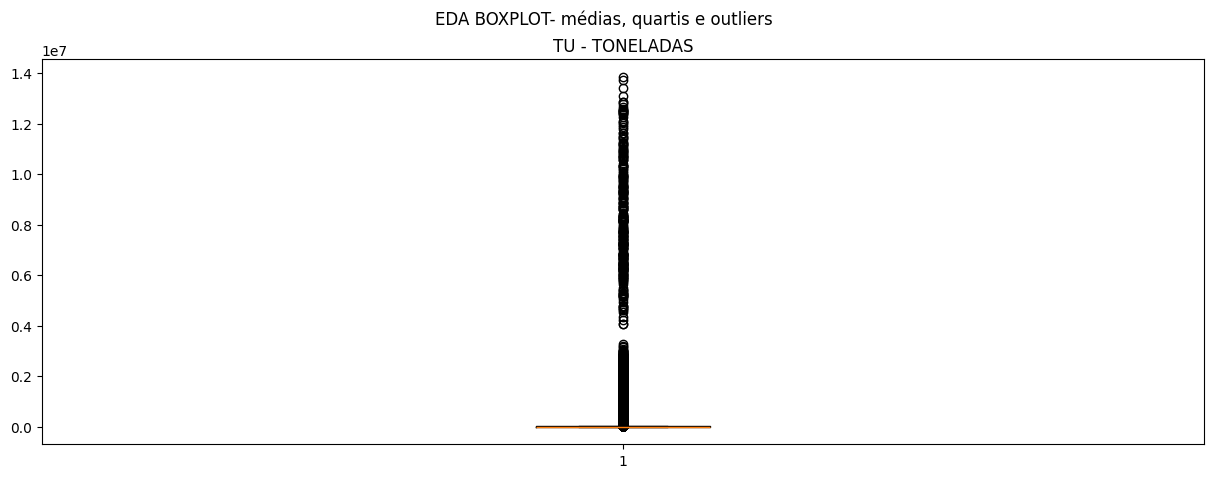

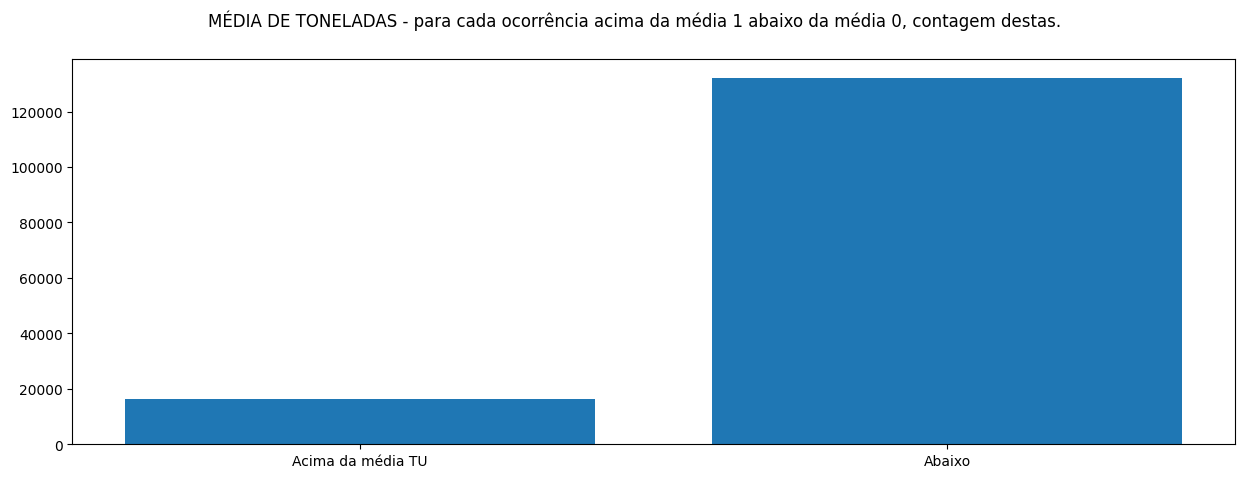

In [33]:
################################################################################


# ANALISE EXPLORATORIA DOS DADOS - EDA

################################################################################



## COLUNAS NÚMERICAS
print('#########################################')
print('EDA COLUNAS NÚMERICAS')
print('----------------------------------')

figura = plt.figure(figsize=(15,5))
figura.suptitle('EDA BOXPLOT- médias, quartis e outliers')

figura.add_subplot(111)
plt.boxplot(base_original['TU'], showfliers=True)
plt.title('TU - TONELADAS')


######
#########################################

# CRIANDO UMA FLAG NA BASE ACIMA OU ABAIXO DA MEDIA
base_original['FLAG_MEDIA_TU'] = np.where(base_original['TU'] >= base_original['TU'].mean(),1,0)
#print(base_original)


figura_2 = plt.figure(figsize=(15,5))
figura_2.suptitle('MÉDIA DE TONELADAS - para cada ocorrência acima da média 1 abaixo da média 0, contagem destas.')


figura_2.add_subplot(111)
acima_tu = base_original[base_original['FLAG_MEDIA_TU'] == 1]['FLAG_MEDIA_TU'].count()
abaixo_tu = base_original[base_original['FLAG_MEDIA_TU'] == 0]['FLAG_MEDIA_TU'].count()
plt.bar(['Acima da média TU', 'Abaixo'], [acima_tu, abaixo_tu])


plt.show()

##################################################

Curtose de Pearson (bruta): 483.4907

##################################################



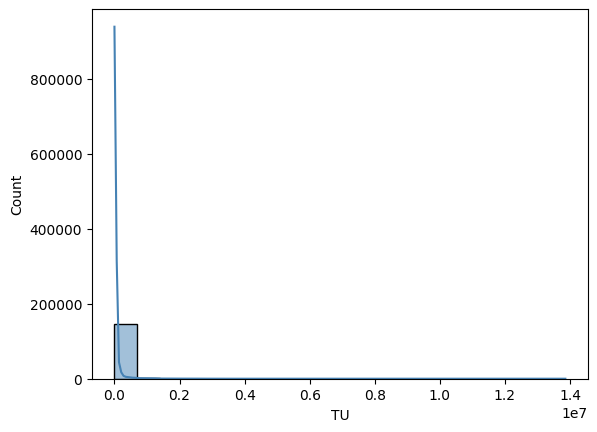

In [34]:
################################################################################


# ANALISE EXPLORATORIA DOS DADOS - EDA

################################################################################


''' 
Estamos plotando a distribuição do conjunto de dados e sua curtose.
A curtose da base atual é alta, acima de 3, isso indica uma curva leptocurtica e que os dados
possuem uma cauda longa em torno da distribuição.

'''


from scipy.stats import kurtosis


##  CURTOSE - KURTOSIS
print('##################################################\n')
curtose_toneladas_log10 = kurtosis(base_original['TU'], fisher=False)
print(f"Curtose de Pearson (bruta): {curtose_toneladas_log10:.4f}")
print('\n##################################################\n')


# DISTRIBUIÇÃO DOS DADOS
sns.histplot(base_original['TU'], kde=True, bins=20, color='steelblue')
plt.show()

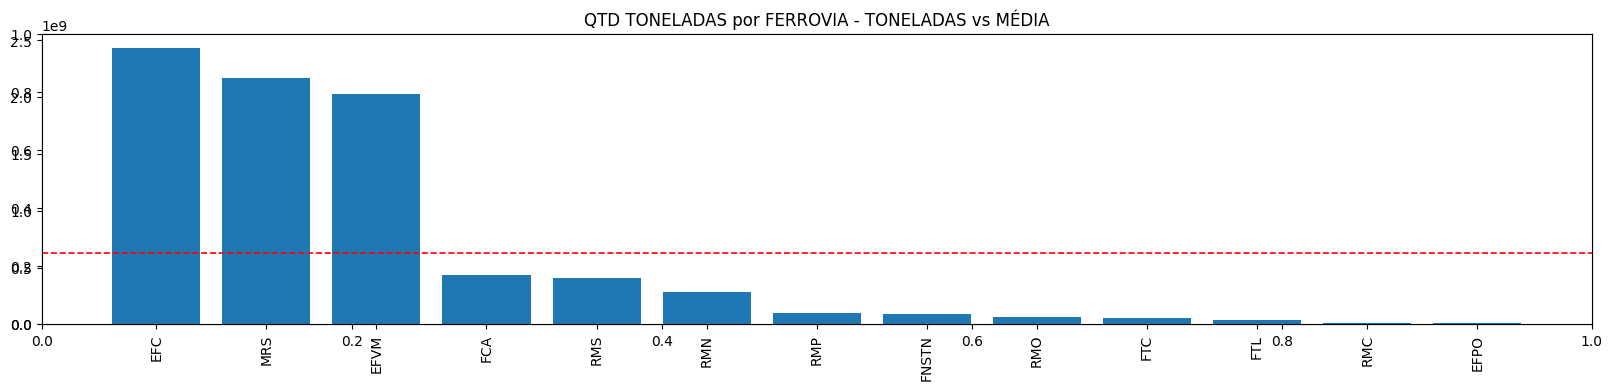

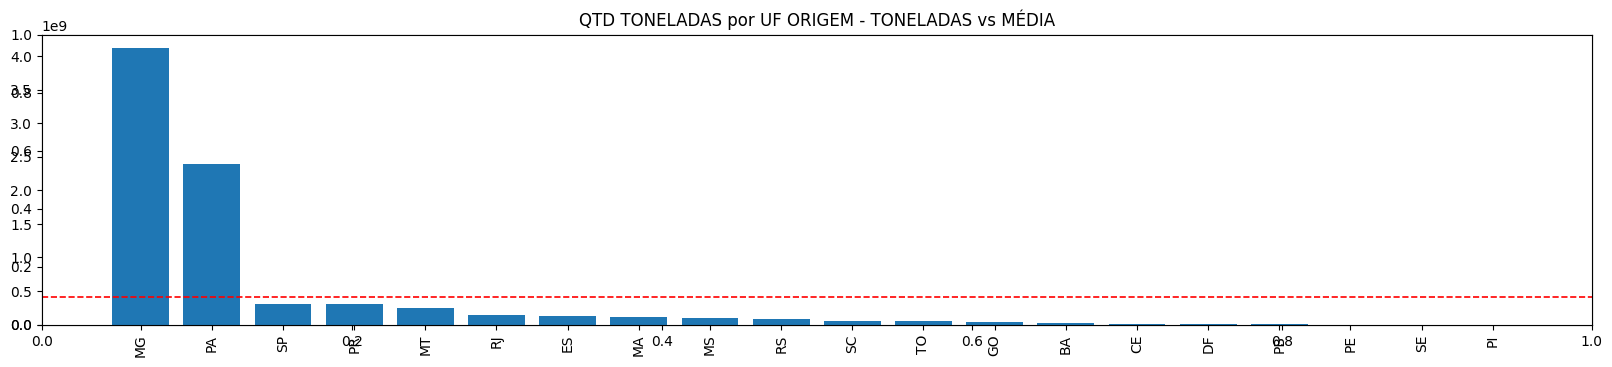

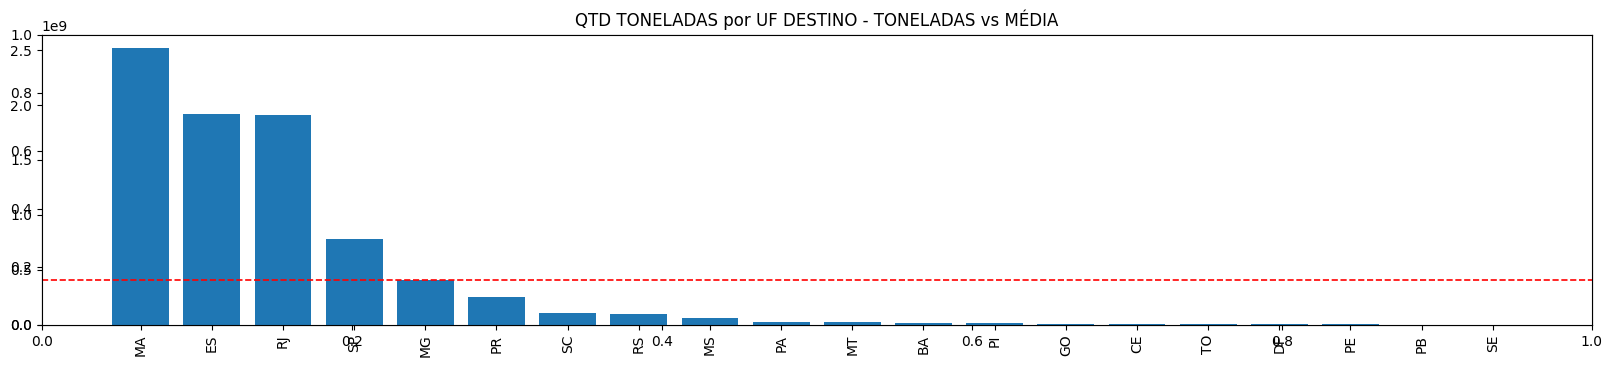

In [35]:
################################################################################


# ANALISE EXPLORATORIA DOS DADOS - EDA

################################################################################


'''   
Estamos visualizando a quantidade de toneladas por ferrovia e origens, para conhecimento da base.

'''

############  FIGURA 1
figura = plt.figure(figsize=(20,5))
plt.title('QTD TONELADAS por FERROVIA - TONELADAS vs MÉDIA')


figura.add_subplot(111)
um = base_original.groupby('Ferrovia')['TU'].sum().reset_index().sort_values(by='TU', ascending=False)
plt.bar(um['Ferrovia'], um['TU'])
plt.xticks(rotation=90)
plt.subplots_adjust(bottom=0.3)
plt.axhline(y= np.mean(um['TU']), color='red', linestyle='--', linewidth=1.2)


############  FIGURA 2
figura2 = plt.figure(figsize=(20,5))
plt.title('QTD TONELADAS por UF ORIGEM - TONELADAS vs MÉDIA')

figura2.add_subplot(111)
dois = base_original.groupby('UF_Origem')['TU'].sum().reset_index().sort_values(by='TU', ascending=False)
plt.bar(dois['UF_Origem'], dois['TU'])
plt.xticks(rotation=90)
plt.subplots_adjust(bottom=0.3)
plt.axhline(y= np.mean(dois['TU']), color='red', linestyle='--', linewidth=1.2)


############ FIGURA 3
figura3 = plt.figure(figsize=(20,5))
plt.title('QTD TONELADAS por UF DESTINO - TONELADAS vs MÉDIA')

figura3.add_subplot(111)
dois = base_original.groupby('UF_Destino')['TU'].sum().reset_index().sort_values(by='TU', ascending=False)
plt.bar(dois['UF_Destino'], dois['TU'])
plt.xticks(rotation=90)
plt.subplots_adjust(bottom=0.3)
plt.axhline(y= np.mean(dois['TU']), color='red', linestyle='--', linewidth=1.2)


plt.show()
#teste.sort_values(by='TU', ascending=False)

In [36]:
'''

AQUI VAMOS CRIAR O DATASET DO MODELO
FAZENDO ETL COM AS COLUNAS CATEGORICAS E APLICANDO CÓDIGOS PARA CADA UMA, 
POSTERIORMENTE USANDO AS COLUNAS NUMERICAS REPRESENTADAS COMO VARIAVEIS DO MODELO.
EM VEZ DE USAR O NOME DA FERROVIA ESTAMOS CRIANDO UM CÓDIGO DISTINTO DELA.

'''


####################################################################################

#     CRIANDO DATASET DO MODELO

####################################################################################

# REPRODUTIBILIDADE
np.random.seed(2)


## BASE MODELO
#print(base_original.columns)
print('--------------------')
base_modelo = base_original


# REMOVENDO COLUNA FLAG POIS É UM INCREMENTO
base_modelo = base_modelo.drop('FLAG_MEDIA_TU', axis=1)

# DUMMIES
#base_modelo = pd.get_dummies(base_original)

# TRANSFORMANDO COLUNAS
base_modelo['ANO'] = base_modelo['ANO'].astype(int)
base_modelo['MÊS'] = base_modelo['MÊS'].astype(int)
base_modelo['TU'] = base_modelo['TU'].astype(int)

#
############### CRIANDO OS CÓDIGOS DE CADA CATEGORIA
# SELECIONA APENAS AS COLUNAS STRING/CATEGORIAS/OBJETO
categ = base_modelo.select_dtypes(include=['object', 'category']).copy()
# LAMBDA QUE TRANSFORMA AS COLUNAS E NUMEROS
cod_categorica_hoje_1 = categ.apply(lambda col: col.astype('category').cat.codes)
# RENOMEANDO AS COLUNAS DE CODIGO COM PREFIXO
cod_categorica_1 = cod_categorica_hoje_1.add_prefix('Codigo_')


# CONCATENANDO AS BASES DE CODIGOS COM A ORIGINAL
codigos_categorias = pd.concat([base_modelo, cod_categorica_1], axis=1)

print('################# BASE COM DE:PARA ########################\n')
# BASE COM TUDO
codigos_categorias.head(1)


##########  PARA VISUALIZAR DE:PARA DE COLUNA ESPECIFICA
#visualizar_de_para = codigos_categorias[['Ferrovia', 'Codigo_Ferrovia']].drop_duplicates().reset_index(drop=True)
#print('\n################# VERIFICAR ########################\n')
#print(visualizar_de_para.head(3))



--------------------
################# BASE COM DE:PARA ########################



,Ferrovia,Mercadoria_ANTT,Estacao_Origem,UF_Origem,Estacao_Destino,UF_Destino,TU,MÊS,ANO,Codigo_Ferrovia,Codigo_Mercadoria_ANTT,Codigo_Estacao_Origem,Codigo_UF_Origem,Codigo_Estacao_Destino,Codigo_UF_Destino
0,EFC,Álcool,Itaqui Base Combustível,MA,Marabá,PA,184,1,2006,0,98,216,5,234,9


In [37]:
####################################################################################

#     TRANSFORMANDO DATASET DO MODELO RANDOMFOREST

####################################################################################

''' 
AQUI ESTOU REMOVENDO OS VALORES MENORES DE 1000 MIL TONELADAS DE MOVIMENTAÇÃO
POIS ABAIXO DE MIL DEIXA O MODELO RUIM, MUITO COMPLEXO PRA ENTENDER OS DADOS
QUE VARIAM DE ZERO A MILHOES.

'''
# CRIANDO A BASE
base_treino = codigos_categorias.select_dtypes(exclude=['object', 'category']).copy()

#REMOVENDO DUPLICADOS
base_treino = base_treino.drop_duplicates()
base_treino = base_treino.fillna(0)

# SALVANDO BASE DO MODELO COMPLETA SEM FILTROS
base_modelo_completa = base_treino

# LIMITANDO A BASE REMOVENDO 2023
base_treino = base_treino[base_treino['ANO'] != 2023][list(base_treino.columns)]


# REMOVENDO OS OUTLIERS - TUDO QUE É MENOR DE MIL TONELADAS
base_treino = base_treino[base_treino['TU'] >= 1000.00]
base_modelo = base_treino


# REMOVENDO OS OUTLIERS - TUDO QUE ESTÁ MAIOR DO 3º QUARTIL EM TONELADAS
#q3 = base_treino['TU'].quantile(0.75)
#base_treino = base_treino[base_treino['TU'] <= q3]
#base_modelo = base_treino



# LOGARITMO BASE10
base_modelo['TU_LOG10'] = np.log10(base_modelo['TU'])

# REMOVENDO COLUNA REAL
base_modelo = base_modelo.drop('TU', axis=1)


base_modelo = base_modelo[["MÊS", "ANO", "Codigo_Ferrovia", "Codigo_Mercadoria_ANTT",
                          "Codigo_Estacao_Origem", "Codigo_UF_Origem", "Codigo_Estacao_Destino",
                          "Codigo_UF_Destino", "TU_LOG10"]]


print('################# BASE MODELO ########################')
print(base_modelo.head(3))
base_modelo.describe()


################# BASE MODELO ########################
   MÊS   ANO  Codigo_Ferrovia  Codigo_Mercadoria_ANTT  Codigo_Estacao_Origem  \
1    1  2006                0                      11                    316   
2    1  2006                0                      22                    293   
3    1  2006                0                      44                     36   

   Codigo_UF_Origem  Codigo_Estacao_Destino  Codigo_UF_Destino  TU_LOG10  
1                 5                     187                  5      3.21  
2                 9                     296                  5      4.39  
3                 5                     297                  5      5.07  


,MÊS,ANO,Codigo_Ferrovia,Codigo_Mercadoria_ANTT,Codigo_Estacao_Origem,Codigo_UF_Origem,Codigo_Estacao_Destino,Codigo_UF_Destino,TU_LOG10
count,109216.00,109216.00,109216.00,109216.00,109216.00,109216.00,109216.00,109216.00,109216.00
mean,6.55,2013.46,6.90,53.71,234.52,10.26,224.13,11.75,4.03
std,3.43,5.00,3.92,30.10,127.57,5.37,121.22,5.59,0.68
min,1.00,2006.00,0.00,0.00,1.00,0.00,0.00,0.00,3.00
25%,4.00,2009.00,3.00,23.00,132.00,6.00,127.00,6.00,3.51
50%,7.00,2013.00,7.00,59.00,247.00,9.00,233.00,13.00,3.92
75%,10.00,2018.00,12.00,81.00,341.00,15.00,340.00,18.00,4.42
max,12.00,2022.00,12.00,101.00,437.00,19.00,410.00,19.00,7.14


##################################################
 O ano maximo dataset de treino é:
 {np.int64(2022)}
##################################################

 Colunas da base final:
 Index(['MÊS', 'ANO', 'Codigo_Ferrovia', 'Codigo_Mercadoria_ANTT',
       'Codigo_Estacao_Origem', 'Codigo_UF_Origem', 'Codigo_Estacao_Destino',
       'Codigo_UF_Destino', 'TU_LOG10'],
      dtype='object')
##################################################

Curtose de Pearson (bruta) - Após LOG10: 3.9091
##################################################



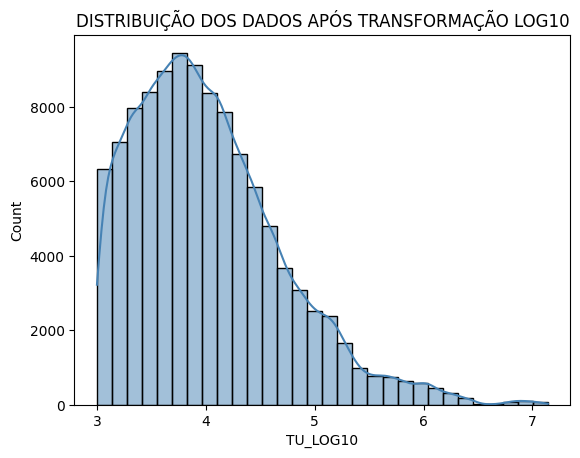

In [38]:
################################################################################


# ANALISE EXPLORATORIA DOS DADOS QUE VAO AO MODELO - EDA

################################################################################

'''

ESTE EDA SERÁ FEITO PARA PODERMOS COMPARAR A DISTRIBUIÇÃO ANTERIOR COM A 
DISTRIBUIÇÃO APÓS TRANSFORMAÇÃO LOGARITMICA.
EM COMPARAÇÃO A CURTOSE AGORA CAIU PARA 3.9, MAS AINDA ACIMA DE 3. A CURVA DA DISTRIBUIÇÃO ESTÁ
LEPTOCURTICA AINDA MAS AGORA OS DADOS ESTÃO MELHOR ESPALHADOS.

'''


# REPRODUTIBILIDADE
np.random.seed(2)

# ########  VERIFICANDO A BASE ANTES DE ENVIAR AO MODELO
print('##################################################')
print(' O ano maximo dataset de treino é:\n', {base_modelo['ANO'].max()})
print('##################################################\n')
print(' Colunas da base final:\n', base_modelo.columns)


##  CURTOSE - KURTOSIS
print('##################################################\n')
curtose_toneladas_log10 = kurtosis(base_modelo['TU_LOG10'], fisher=False)
print(f"Curtose de Pearson (bruta) - Após LOG10: {curtose_toneladas_log10:.4f}")



# DISTRIBUIÇÃO DO DATASET COM LOG10
print('##################################################\n')
sns.histplot(base_modelo['TU_LOG10'], kde=True, bins=30, color='steelblue')
plt.title('DISTRIBUIÇÃO DOS DADOS APÓS TRANSFORMAÇÃO LOG10')
plt.show()

In [39]:
################################################################################


# ANALISE EXPLORATORIA DOS DADOS QUE VAO AO MODELO - EDA

################################################################################


base_modelo.describe()

,MÊS,ANO,Codigo_Ferrovia,Codigo_Mercadoria_ANTT,Codigo_Estacao_Origem,Codigo_UF_Origem,Codigo_Estacao_Destino,Codigo_UF_Destino,TU_LOG10
count,109216.00,109216.00,109216.00,109216.00,109216.00,109216.00,109216.00,109216.00,109216.00
mean,6.55,2013.46,6.90,53.71,234.52,10.26,224.13,11.75,4.03
std,3.43,5.00,3.92,30.10,127.57,5.37,121.22,5.59,0.68
min,1.00,2006.00,0.00,0.00,1.00,0.00,0.00,0.00,3.00
25%,4.00,2009.00,3.00,23.00,132.00,6.00,127.00,6.00,3.51
50%,7.00,2013.00,7.00,59.00,247.00,9.00,233.00,13.00,3.92
75%,10.00,2018.00,12.00,81.00,341.00,15.00,340.00,18.00,4.42
max,12.00,2022.00,12.00,101.00,437.00,19.00,410.00,19.00,7.14


In [40]:


############################################################################


#  CIRANDO O MODELO E APLICANDO NA BASE DE TREINO

############################################################################



'''

HIPÓTESE NULA = SERÁ QUE MEU MODELO CONSEGUE EXPLICAR AS TONELADAS TRANSPORTADAS
APENAS COM AS DEMAIS COLUNAS DO NOSSO DATASET ?

ESTOU CRIANDO UM MODELO DUMMY QUE VAI PREVER SEMPRE A MEDIANA, AFIM DE COMPARAR
OS RESULTADOS COM MODELO PRINCIPAL. DUMMY REGRESSOR.

'''


from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import KFold, cross_val_score, train_test_split, learning_curve, TimeSeriesSplit
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score, classification_report
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, median_absolute_error
from sklearn.datasets import make_regression
from sklearn.dummy import DummyRegressor

# REPRODUTIBILIDADE
np.random.seed(2)

########################  CRIANDO MODELO DUMMY PARA COMPARAR
# 1. GERAR A BASE
x_dummy = base_modelo.drop(columns=['TU_LOG10'])
y_dummy = base_modelo['TU_LOG10']
x_train_dummy, x_test_dummy, y_train_dummy, y_test_dummy = train_test_split(x_dummy, y_dummy, test_size=0.2, random_state=42)

# 2. MODELO BASE LINE (DUMMY REGRESSOR)
dummy = DummyRegressor(strategy="median")
dummy.fit(x_train_dummy, y_train_dummy)
y_pred_dummy = dummy.predict(x_test_dummy)

print('----------  RESULTADOS MODELO DUMMY  ----------')
print("R²:", r2_score(y_test_dummy, y_pred_dummy))
print("MSE:", mean_squared_error(10**y_test_dummy, 10**y_pred_dummy))
print('RMSE: ', np.sqrt(mean_squared_error(10**y_test_dummy, 10**y_pred_dummy)))
print('######################################################\n')


########################  CRIANDO MODELO PRINCIPAL
# DEFININDO X (VAR DEPENDENTE) Y (VAR TARGET)
x = base_modelo.drop(columns=['TU_LOG10'])
y = base_modelo['TU_LOG10']


# ORDENAÇÃO DOS DADOS PARA A BASE DE TREINO
x = x[['MÊS', 'ANO', 'Codigo_Ferrovia', 'Codigo_Mercadoria_ANTT', 'Codigo_Estacao_Origem',
                                           'Codigo_UF_Origem', 'Codigo_Estacao_Destino', 'Codigo_UF_Destino']]


# SEPARANDO TREINO E TESTE
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.1)

# CRIANDO MODELO (10 arvores, profundidade 5, replicabilidade seed 2)
modelo = RandomForestRegressor(n_estimators=10, max_depth=5, random_state=2)

# VALIDAÇÃO CRUZADA
kf = KFold(n_splits=5, shuffle= True, random_state=2)
cross_validation = cross_val_score(modelo, x, y, cv=kf, scoring='r2')

# APLICANDO LOG() PARA MELHORAR A DISTRIBUIÇÃO DO MODELO - evita heterocedasticidade
#y_train_log = np.log1p(y_train)


# TREINANDO O MODELO
modelo.fit(x_train, y_train)


# USANDO MODELO NO COJUNTO DE TESTE - PREDIÇÃO
y_pred = modelo.predict(x_test)

# OBTENDO R2 DA PREDIÇÃO ANTERIOR
r2_test = r2_score(y_test, y_pred)

# ERRO PERCENTUAL MÉDIO COM LOG10
MAE_LOG10 = mean_absolute_error(y_test, y_pred)
RMSE_LOG10 = np.sqrt(mean_squared_error(y_test, y_pred))
MAPE_LOG10 = mean_absolute_percentage_error(y_test, y_pred)
MEDAE_LOG10 = median_absolute_error(y_test, y_pred)


# ERRO PERCENTUAL MÉDIO SEM LOG10
MAE_REAL = mean_absolute_error(10**y_test, 10**y_pred)
RMSE_REAL = np.sqrt(mean_squared_error(10**y_test, 10**y_pred))
MAPE_REAL = mean_absolute_percentage_error(10**y_test, 10**y_pred)
MEDAE_REAL = median_absolute_error(10**y_test, 10**y_pred)


########## RESULTADOS VALIDAÇÃO CRUZADA
print('----------  RESULTADOS VALIDAÇÃO CRUZADA  ----------')
print(f"O tipo do modelo carregado é: {type(modelo)}")
print(f"Acuracia para cada fold (cross-validation): {cross_validation}")
print(f"Acuracia média (cross-validation): {cross_validation.mean()*100}")
print(f"Desvio padrão (cross validation): {cross_validation.std()}")
print(f"R² no conjunto de teste: {r2_test:.2f}")
print("MAE:", MAE_REAL)
print("RMSE:", RMSE_REAL)
print(f"MAPE: {MAPE_REAL:.2%}")
print(f"MedAE: {MEDAE_REAL:.2f}")

----------  RESULTADOS MODELO DUMMY  ----------
R²: -0.022201650028803588
MSE: 197758892407.15936
RMSE:  444700.90218838025
######################################################

----------  RESULTADOS VALIDAÇÃO CRUZADA  ----------
O tipo do modelo carregado é: <class 'sklearn.ensemble._forest.RandomForestRegressor'>
Acuracia para cada fold (cross-validation): [0.44116226 0.43119652 0.44544538 0.44417819 0.42601058]
Acuracia média (cross-validation): 43.759858646603774
Desvio padrão (cross validation): 0.007652862914889992
R² no conjunto de teste: 0.44
MAE: 65143.94819505441
RMSE: 464205.69970473036
MAPE: 145.55%
MedAE: 5514.32


In [41]:

'''

HIPÓTESE NULA = SERÁ QUE MEU MODELO CONSEGUE EXPLICAR AS TONELADAS TRANSPORTADAS
APENAS COM AS DEMAIS COLUNAS DO NOSSO DATASET ?


############# PARAMETROS DO MODELO
MODELO COM VALIDAÇÃO CRUZADA DE 5 FOLDS CRIADO COM OS PARAMETROS:

N_ESTIMATORS = 300
300 ARVORES DE DECISÃO NO MÁXIMO

MAXDEPTH = 15
PERMITE CRIAR ARVORES MAIS PROFUNDAS E TRAZ ALEATORIEDADE AOS DADOS, GENERALIZAÇÃO.

RANDOM_STATE = 2
REPLICABILIDADE DE RESULTADOS

MAX_FEATURES = 'SQRT' 
ELE NÃO USA TODAS AS FEATURES NOS NÓS, ELE USA A RAIZ QUADRADA DO TOTAL DE COLUNAS.
DESTA FORMA O MODELO É FORÇADO COM DADOS E CENÁRIOS COMPLEXOS.

MIN_SAMPLES_SPLIT = 10
O MODELO SÓ VAI CRIAR OUTRO NÓ SE TIVER PELO MENOS 10 REGISTROS PRA SEGUIR ADIANTE

MIN_SAMPLES_LEAF = 5
CADA FOLHA FINAL DEVE CONTER PELO MENOS 5 REGISTROS


############# AVALIAÇÕES
# MAE (ERRO ABSOLUTO MEDIO)
Em média, o modelo erra cerca de 1.560 toneladas na previsão de TU. Esse valor deve ser 
interpretado em relação à escala dos dados — se TU varia de 0 a milhões, 
esse erro pode ser tolerável; se não, pode ser alto ......Em nossa base a coluna TARGET varia entre 0 e 13.858.719.00
1560 é tolerável

# MAPE
Este é o erro médio MAE só que em percentual.

# RMSE
Raiz do erro quadratico médio - (Raise mean squared error)
Esse erro penaliza mais fortemente grandes erros. Um RMSE muito maior que o MAE (como no nosso cenario 2.650) indica que 
há outliers ou erros muito grandes em alguns casos que estão influenciando bastante a performance.

# MEDAE
Este é a mediana dos erros, mostra como os erros estão distribuidos, o meio entre eles.

Avaliamos:
MAE para entender o erro médio bruto.
MAPE é o MAE em %.
RMSE se quiser punir grandes erros, fica sempre maior mas não tanto.
MedAE onde é o meio ? mediana dos erros.

'''


############################################################################


#  AJUSTANDO OS PARAMETROS DO MODELO

############################################################################



# REPRODUTIBILIDADE
np.random.seed(2)

base_modelo = base_modelo.sort_values(by=["ANO", "MÊS"])
########################  CRIANDO MODELO DUMMY PARA COMPARAR
# 1. GERAR A BASE
x_dummy = base_modelo.drop(columns=['TU_LOG10'])
y_dummy = base_modelo['TU_LOG10']
x_train_dummy, x_test_dummy, y_train_dummy, y_test_dummy = train_test_split(x_dummy, y_dummy, test_size=0.2, random_state=42)


# 2. MODELO BASE LINE (DUMMY REGRESSOR)
dummy = DummyRegressor(strategy="median")
dummy.fit(x_train_dummy, y_train_dummy)
y_pred_dummy = dummy.predict(x_test_dummy)

print('----------  RESULTADOS MODELO DUMMY  ----------')
print("R²:", r2_score(y_test_dummy, y_pred_dummy))
print("MSE:", mean_squared_error(10**y_test_dummy, 10**y_pred_dummy))
print('RMSE: ', np.sqrt(mean_squared_error(10**y_test_dummy, 10**y_pred_dummy)))
print('######################################################\n')




########################  CRIANDO MODELO PRINCIPAL
# DEFININDO X (VAR DEPENDENTE) Y (VAR TARGET)
x = base_modelo.drop(columns=['TU_LOG10'])
y = base_modelo['TU_LOG10']


# ORDENAÇÃO DOS DADOS PARA A BASE DE TREINO
x = x[['MÊS', 'ANO', 'Codigo_Ferrovia', 'Codigo_Mercadoria_ANTT', 'Codigo_Estacao_Origem',
                                           'Codigo_UF_Origem', 'Codigo_Estacao_Destino', 'Codigo_UF_Destino']]


# SEPARANDO TREINO E TESTE
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.1)

# CRIANDO MODELO
modelo = RandomForestRegressor(n_estimators=300, 
                               max_depth=15, 
                               random_state=2, 
                               max_features='sqrt', 
                               min_samples_split=10, 
                               min_samples_leaf=5)

# VALIDAÇÃO CRUZADA
kf = KFold(n_splits=5, shuffle= True, random_state=2)
cross_validation = cross_val_score(modelo, x, y, cv=kf, scoring='r2')

# APLICANDO LOG() PARA MELHORAR A DISTRIBUIÇÃO DO MODELO - evita heterocedasticidade
#y_train_log = np.log1p(y_train)


# TREINANDO O MODELO
modelo.fit(x_train, y_train)


# USANDO MODELO NO COJUNTO DE TESTE - PREDIÇÃO
y_pred = modelo.predict(x_test)

# OBTENDO R2 DA PREDIÇÃO ANTERIOR
r2_test = r2_score(y_test, y_pred)



# ERRO PERCENTUAL MÉDIO COM LOG10
MAE_LOG10 = mean_absolute_error(y_test, y_pred)
MSE_LOG10 = mean_squared_error(y_test, y_pred)
RMSE_LOG10 = np.sqrt(mean_squared_error(y_test, y_pred))
MAPE_LOG10 = mean_absolute_percentage_error(y_test, y_pred)
MEDAE_LOG10 = median_absolute_error(y_test, y_pred)


# ERRO PERCENTUAL MÉDIO SEM LOG10
MAE_REAL = mean_absolute_error(10**y_test, 10**y_pred)
MSE_REAL = mean_squared_error(10**y_test, 10**y_pred)
RMSE_REAL = np.sqrt(mean_squared_error(10**y_test, 10**y_pred))
MAPE_REAL = mean_absolute_percentage_error(10**y_test, 10**y_pred)
MEDAE_REAL = median_absolute_error(10**y_test, 10**y_pred)

########## RESULTADOS VALIDAÇÃO CRUZADA
print('----------  RESULTADOS MODELO PRINCIPAL  ----------')
print(f"O tipo do modelo carregado é: {type(modelo)}")
print(f"Acuracia para cada fold (cross-validation): {cross_validation}")
print(f"Acuracia média (cross-validation): {cross_validation.mean()*100}")
print(f"Desvio padrão (cross validation): {cross_validation.std()}")
print(f"R²: {r2_test:.2f}")
print("MAE:", MAE_REAL)
print("MSE (Mean squared error):", MSE_REAL)
print("RMSE (Root Mean Squared Error):", RMSE_REAL)
print(f"MAPE: {MAPE_REAL:.2%}")
print(f"MedAE: {MEDAE_REAL:.2f}")



###################################################################

#   SALVANDO MODELO

###################################################################


from joblib import dump, load

print('####################################################')
print('----------  MODELO SALVO NA PASTA  ----------')
dump(modelo,'ANTT_RANDOMFORESTREGRESSOR.joblib')

----------  RESULTADOS MODELO DUMMY  ----------
R²: -0.022201650028803588
MSE: 197758892407.15936
RMSE:  444700.90218838025
######################################################

----------  RESULTADOS MODELO PRINCIPAL  ----------
O tipo do modelo carregado é: <class 'sklearn.ensemble._forest.RandomForestRegressor'>
Acuracia para cada fold (cross-validation): [0.79555957 0.79177808 0.79553616 0.79339211 0.79126639]
Acuracia média (cross-validation): 79.35064605190799
Desvio padrão (cross validation): 0.0018084923567351651
R²: 0.80
MAE: 38327.9336225492
MSE (Mean squared error): 75113193264.18324
RMSE (Root Mean Squared Error): 274067.86251617176
MAPE: 73.33%
MedAE: 3261.38
####################################################
----------  MODELO SALVO NA PASTA  ----------


['ANTT_RANDOMFORESTREGRESSOR.joblib']

In [53]:
############################################################################

# VALIDANDO RESULTADOS MODELO NO CENARIO FICTICIO


############################################################################



''' 

KOLMOGOROV SMIRNOV - Teste para comparar as distribuições do conjunto de treino e teste (apenas as features). será que ao longo do meu ETL ou com recebimento de novos registros, 
a distribuição dos meus dados mudou ? Se eu treinar o modelo com uma distribuição x e em produção usar ele com um conjunto com distribuição y, isso pode diminuir 
a perfomance do modelo nas predições.

p < 0,05 → baixa chance de ser coincidência → diferença é real → distribuições diferentes → drift
p ≥ 0,05 → diferença pode ser só coincidência → não rejeita-se H0 → distribuições parecem iguais
'''


from scipy.stats import ks_2samp
import pandas as pd


# REPRODUTIBILIDADE
np.random.seed(2)


# DICIONARIO PARA RECEBER OS VALORES
ks_results = {}

for col in x_train.columns:
    #Para cada coluna, aplica o teste de Kolmogorov–Smirnov (KS Test)
    stat, p_value = ks_2samp(x_train[col], x_test[col])
    ks_results[col] = {"stat": stat, "p_value": p_value}

# Mostra o resultado de cada feature
for col, result in ks_results.items():
    print(f"{col}: KS_stat={result['stat']:.4f}, p_value={result['p_value']:.6f}")


print('####################################\n')
print(r'''p < 0,05 → baixa chance de ser coincidência → diferença é real → distribuições diferentes → drift
p ≥ 0,05 → diferença pode ser só coincidência → não rejeita-se H0 (hipótese nula) → distribuições parecem iguais''')


#Seleciona apenas as features que apresentaram drift
drift_cols = [col for col, vals in ks_results.items() if vals["p_value"] < 0.05]
no_drift_cols = [col for col, vals in ks_results.items() if vals["p_value"] >= 0.05]

print('####################################\n')
print("Features COM drift:", drift_cols)
print("Features SEM drift:", no_drift_cols)


MÊS: KS_stat=0.0087, p_value=0.438319
ANO: KS_stat=0.0055, p_value=0.928112
Codigo_Ferrovia: KS_stat=0.0040, p_value=0.996891
Codigo_Mercadoria_ANTT: KS_stat=0.0116, p_value=0.141380
Codigo_Estacao_Origem: KS_stat=0.0143, p_value=0.036560
Codigo_UF_Origem: KS_stat=0.0084, p_value=0.484142
Codigo_Estacao_Destino: KS_stat=0.0089, p_value=0.418075
Codigo_UF_Destino: KS_stat=0.0055, p_value=0.926525
####################################

p < 0,05 → baixa chance de ser coincidência → diferença é real → distribuições diferentes → drift
p ≥ 0,05 → diferença pode ser só coincidência → não rejeita-se H0 (hipótese nula) → distribuições parecem iguais
####################################

Features COM drift: ['Codigo_Estacao_Origem']
Features SEM drift: ['MÊS', 'ANO', 'Codigo_Ferrovia', 'Codigo_Mercadoria_ANTT', 'Codigo_UF_Origem', 'Codigo_Estacao_Destino', 'Codigo_UF_Destino']


In [15]:
############################################################################


# VALIDAÇÃO DO MODELO


############################################################################


'''

A TABELA DE PREDIÇÕES AJUDA A ENTENDER O COMPORTAMENTO DO MODELO, PERMITE
VISUALIZAR AS COLUNAS DE VALORES REAIS vs VALORES PREDITOS.
PERMITE VISUALIZAR O ERRO.

'''


# REPRODUTIBILIDADE
np.random.seed(2)


# TABELA FINAL DE RESULTADOS:
y_true = y_test.reset_index(drop=True)


# TABELA DE RESULTADOS COM A TRANSFORMAÇÃO LOG10
resultados = pd.DataFrame({
    'Valor LOG10': y_true,
    'Valor Predito': y_pred,
    'Residuo': (y_true - y_pred),
    'Erro Absoluto': abs(y_true - y_pred),
    'Erro Percentual (%)': abs((y_true - y_pred) / y_true) * 100
}).sort_values('Erro Percentual (%)', ascending=False)


# TABELA DE RESULTADOS SEM A TRANSFORMAÇÃO LOG10
resultados_2 = pd.DataFrame({
    'Valor Real': 10 ** y_true,
    'Valor Predito': 10 ** y_pred,
    'Residuo': (10 ** y_true - 10 ** y_pred),
    'Erro Absoluto': abs(10 ** y_true - 10 ** y_pred),
    'Erro Percentual (%)': abs((10 ** y_true - 10 ** y_pred) / 10 ** y_true) * 100
}).sort_values('Erro Percentual (%)', ascending=False)


# MEDIDAS RAPIDAS
mediana_erro_absoluto_log10 = resultados['Erro Absoluto'].median()
mediana_erro_absoluto = resultados_2['Erro Absoluto'].median()

# VISUALIZANDO AS INFORMAÇÕES
print(f"Mediana dos erros em LOG10: {mediana_erro_absoluto_log10:.2f}")
print(f"Mediana dos erros real: {mediana_erro_absoluto:.2f}")
print('Eu posso pegar apenas os erros acima da mediana e retreinar o modelo')
print('\n############## TABELA VALIDAÇÃO LOG10 #############################')
print(resultados.head(3))

print('\n############## TABELA VALIDAÇÃO REAL #############################')
print(resultados_2.head(3))

Mediana dos erros em LOG10: 0.20
Mediana dos erros real: 3261.38
Eu posso pegar apenas os erros acima da mediana e retreinar o modelo

############## TABELA VALIDAÇÃO LOG10 #############################
      Valor LOG10  Valor Predito  Residuo  Erro Absoluto  Erro Percentual (%)
989          3.04           4.80    -1.77           1.77                58.19
8545         3.20           4.86    -1.66           1.66                51.74
921          3.02           4.46    -1.45           1.45                47.90

############## TABELA VALIDAÇÃO REAL #############################
      Valor Real  Valor Predito   Residuo  Erro Absoluto  Erro Percentual (%)
989      1088.00       63640.79 -62552.79       62552.79              5749.34
8545     1584.00       71690.86 -70106.86       70106.86              4425.94
921      1041.00       29019.99 -27978.99       27978.99              2687.70


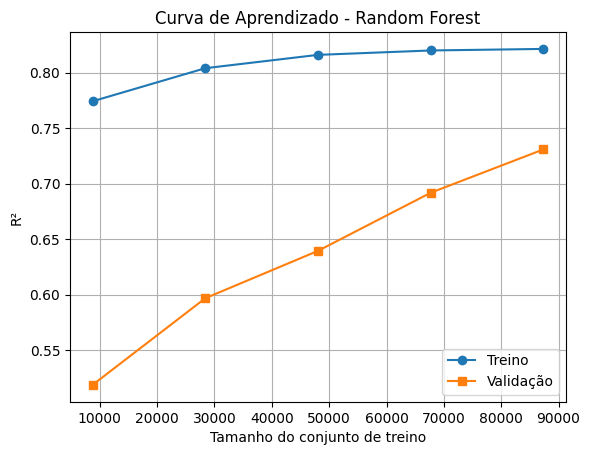

In [16]:
############################################################################


# VALIDAÇÃO DO MODELO


############################################################################


''' 

A curva de aprendizado mostra a generalização do modelo em relação aos dados de treino x teste.
Perceba que na linha azul do gráfico, os numeros ficam sempre próximos de 1 (100%) ....mas quando
olhamos a linha laranja os números começam em ~64 e estabilizam em ~80.

O modelo está aprendendo demais o treino, mas não aprende padrões gerais, por isso ele generaliza mal nos registros novos/teste.
Isso caracteriza Overfitting (sobreajuste) pois o modelo aprendeu demais no treino e fixou aquilo como regra.

'''
# REPRODUTIBILIDADE
np.random.seed(2)

# CURVA DE APRENDIZADO

train_sizes, train_scores, test_scores = learning_curve(
    modelo, x, y, cv=5, scoring='r2', n_jobs=-1 )

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_mean, label='Treino', marker='o')
plt.plot(train_sizes, test_mean, label='Validação', marker='s')
plt.xlabel('Tamanho do conjunto de treino')
plt.ylabel('R²')
plt.title('Curva de Aprendizado - Random Forest')
plt.legend()
plt.grid(True)
plt.show()


c:\Users\Guilh\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


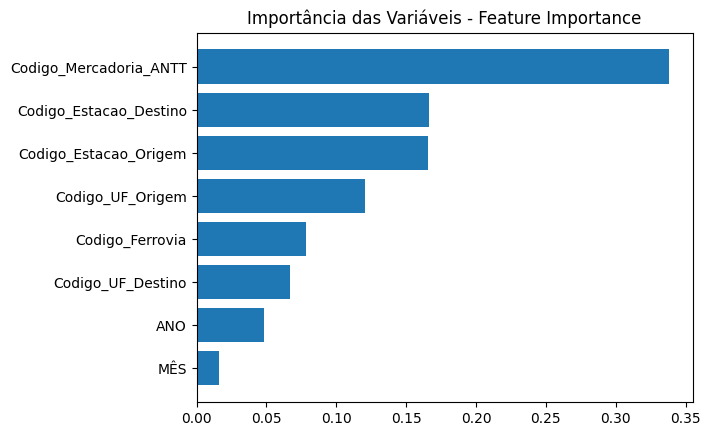

C:\Users\Guilh\AppData\Local\Temp\ipykernel_9788\540673262.py:52: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values_main, amostra)


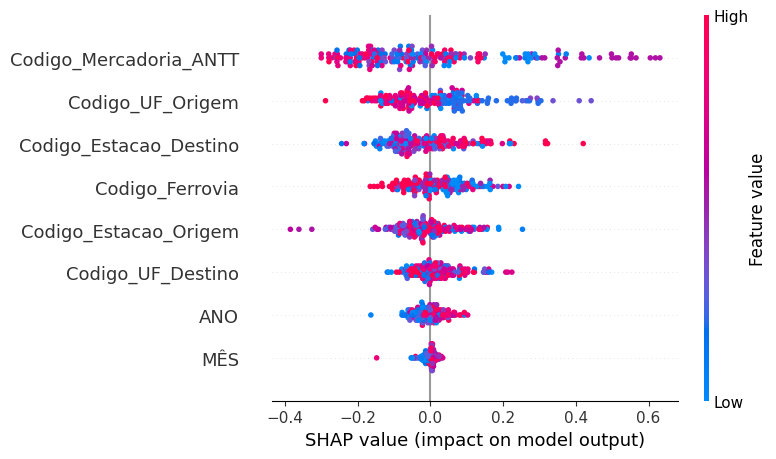

                  Feature  Feature Value  SHAP Value        Contribuição
0                     MÊS              3        0.01  ↑ Aumenta prediçao
1                     ANO           2013        0.08  ↑ Aumenta prediçao
2         Codigo_Ferrovia             12        0.07  ↑ Aumenta prediçao
3  Codigo_Mercadoria_ANTT            100       -0.04    ↓ Reduz predição
4   Codigo_Estacao_Origem             31        0.04  ↑ Aumenta prediçao
5        Codigo_UF_Origem             13        0.02  ↑ Aumenta prediçao
6  Codigo_Estacao_Destino            236        0.09  ↑ Aumenta prediçao
7       Codigo_UF_Destino             13        0.06  ↑ Aumenta prediçao


In [17]:
############################################################################


# VALIDAÇÃO DO MODELO


############################################################################


'''  

FEATURE IMPORTANCE permite verificar quais variáveis estão sendo mais beneficas para as predições

SHAP é uma técnica que atribui a contribuição individual de cada variável 
para a predição de um modelo. Ele responde à pergunta: 
"Quanto cada feature influenciou para aumentar ou diminuir o valor previsto?"

No grafico de IMPACTO DO SHAPE temos os registros representados em bolinhas azuis e vermelhas.
as bolinhas azuis representam os valores baixos daquela variavel e os valores vermelhos os valores altos daquela variavel.
No caso da feature ANO vemos uma concentração vermelha para direita o que indica que quanto maior o valor do ANO maior a predição,
as bolinhas azuis se concentram do lado esquerdo o que significa que ANO menores diminuem a predição.
'''

import shap

# REPRODUTIBILIDADE
np.random.seed(2)

############ IMPORTANCIA DAS VARIAVEIS - FEATURE IMPORTANCE

importances = modelo.feature_importances_
features = x.columns

feat_imp = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_imp = feat_imp.sort_values('Importance', ascending=False)

plt.barh(feat_imp['Feature'], feat_imp['Importance'])
plt.title('Importância das Variáveis - Feature Importance')
plt.gca().invert_yaxis()
plt.show()



############  EXPLICABILIDADE DAS COLUNAS COM SHAP

# AMOSTRA DOS DADOS
amostra = x.sample(200, random_state=42)

# SHAP DO MODELO PRINCIPAL
explainer_main = shap.TreeExplainer(modelo)
shap_values_main = explainer_main.shap_values(amostra)
shap.summary_plot(shap_values_main, amostra)

# SHAP DAS COLUNAS INDIVIDUAIS
instance_index = 0
shap_df = pd.DataFrame({
    'Feature': x_test.columns,
    'Feature Value': x_test.iloc[instance_index].values,
    'SHAP Value': shap_values_main[instance_index]
})

# Adiciona coluna de contribuição
shap_df['Contribuição'] = shap_df['SHAP Value'].apply(lambda x: '↑ Aumenta prediçao' if x > 0 else '↓ Reduz predição')

print(shap_df)

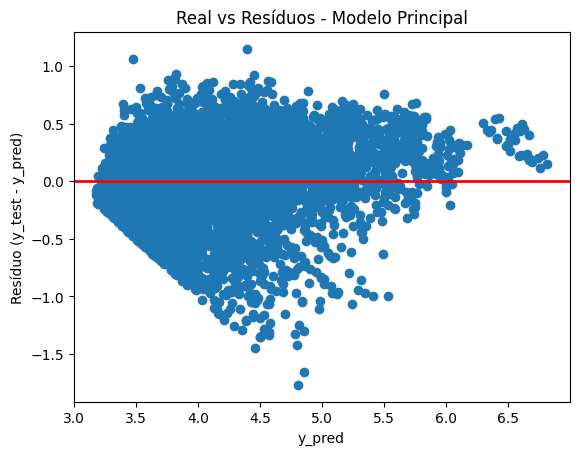

In [18]:
############################################################################


# VALIDAÇÃO DO MODELO


############################################################################


'''  
O gráfico dos residuos demonstra HETEROCEDASTICIDADE pois os residuos estão muito espalhados
pelo gráfico, parecendo um fúnil ou tempestade. Isso significa que o modelo erra mais para
algumas classes do que em outras, isso pode indicar a falta features importantes.
Os riscos de usar um modelo que erra forte uma determinada classe é algo delicado a se pensar.

'''

# GRAFICO DE REAL vs RESIDUOS
plt.scatter(y_pred, (y_test - y_pred))
plt.title("Real vs Resíduos - Modelo Principal")
plt.axhline(0, color='red', linewidth=2)
plt.xlabel('y_pred')
plt.ylabel('Resíduo (y_test - y_pred)')
plt.show()


In [19]:
###################################################################

# CRIANDO MODELO REFINADO COM OS ERROS

###################################################################


# DATAFRAME COM OS ERROS
resultados = x_test.copy()

# ADICIONANDO AS COLUNAS OBJETIVO
resultados['Valor LOG10'] = y_test
resultados['Valor Predito'] = y_pred
resultados['Residuo'] = y_test - y_pred
resultados['Erro Absoluto'] = abs(resultados['Residuo'])
resultados['Erro Percentual (%)'] = abs(resultados['Residuo'] / y_test) * 100


# FILTRANDO APENAS ERROS
erros_grandes = resultados[resultados['Residuo'] != 0]


# DEFININDO AS VARIAVEIS PARA O NOVO MODELO
x_refinado_erros = erros_grandes[x_train.columns]
y_refinado_erros = erros_grandes['Residuo']


# CRIANDO MODELO REFINADO
modelo_refinado_erros = RandomForestRegressor( n_estimators=300, 
                               max_depth=15, 
                               random_state=2, 
                               max_features='sqrt', 
                               min_samples_split=10, 
                               min_samples_leaf=5)

# TREINANDO MODELO REFINADO
modelo_refinado_erros.fit(x_refinado_erros, y_refinado_erros)


# APLICANDO PREDIÇÃO
y_pred_refinado = modelo_refinado_erros.predict(x_test)


# PREDIÇÃO FINAL JUNTA OS RESULTADOS DO MODELO UM COM O MODELO REFINADO
y_pred_final = y_pred + y_pred_refinado
print('MODELO REFINADO TREINADO')
print('######################################\n')
print('----------  SALVANDO MODELO  ----------')
dump(modelo_refinado_erros,'ANTT_RANDOMFORESTREGRESSOR_REFINADO.joblib')


MODELO REFINADO TREINADO
######################################

----------  SALVANDO MODELO  ----------


['ANTT_RANDOMFORESTREGRESSOR_REFINADO.joblib']

In [20]:
############################################################################


# VALIDAÇÃO DOS MODELOS PRINCIPAL vs REFINADO


############################################################################

'''  
É observado que os erros em geral ficaram menores, um MAPE de 73% caiu para 57%
Refinar o modelo se mostrou positivo


'''

MAE_FINAL  = mean_absolute_error(10 ** y_test, 10 ** y_pred_final)
RMSE_FINAL = np.sqrt(mean_squared_error(10 ** y_test, 10 ** y_pred_final))
MAPE_FINAL = mean_absolute_percentage_error(10 ** y_test, 10 ** y_pred_final)

print('##################  COMPARAÇÕES MODELOS ##################\n')
print("MAE original:", MAE_LOG10)
print("MAE refinado:", MAE_FINAL)
print("---------------------------")
print("RMSE original:", RMSE_LOG10)
print("RMSE refinado:", RMSE_FINAL)
print("---------------------------")
print("MAPE original:", MAPE_LOG10)
print("MAPE refinado:", MAPE_FINAL)

##################  COMPARAÇÕES MODELOS ##################

MAE original: 0.23966935640036013
MAE refinado: 30733.060322651494
---------------------------
RMSE original: 0.30737484220932215
RMSE refinado: 221552.55162360633
---------------------------
MAPE original: 0.061764071829784384
MAPE refinado: 0.5766628537420688


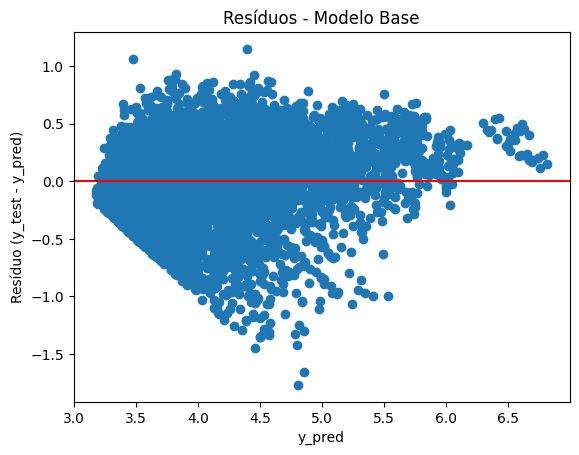

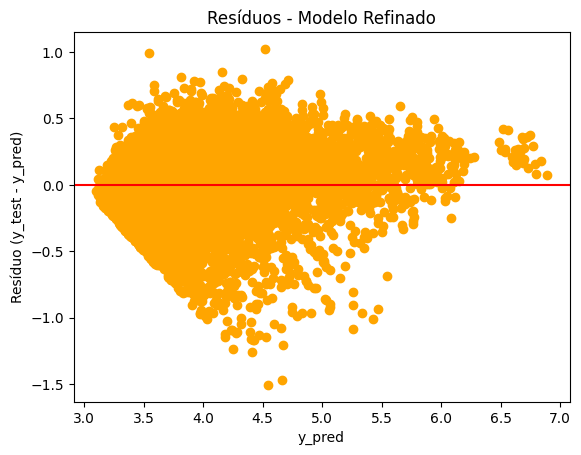

In [21]:
############################################################################


# VALIDAÇÃO DOS MODELOS PRINCIPAL vs REFINADO


############################################################################


''' 

Na comparação dos dois gráficos é observado uma dimimuição na dispersão dos erros ao longo do zero. 
O grupo pequeno destacado no canto direito fica menor em comparação ao outro gráfico.

'''

plt.scatter(y_pred, (y_test - y_pred))
plt.title("Resíduos - Modelo Base")
plt.axhline(0, color='red')
plt.xlabel('y_pred')
plt.ylabel('Resíduo (y_test - y_pred)')
plt.show()

plt.scatter(y_pred_final, (y_test - y_pred_final), color='orange')
plt.title("Resíduos - Modelo Refinado")
plt.axhline(0, color='red')
plt.xlabel('y_pred')
plt.ylabel('Resíduo (y_test - y_pred)')
plt.show()

In [22]:



###################################################################

# CRIANDO A BASE DO CENARIO FICTÍCIO

###################################################################



'''
AQUI APLICAMOS O MODELO NO CENARIO FICTICIO PARA VER COMO ELE GENERALIZA COM OS DADOS EM UM CENÁRIO
DESCONHECIDO. AQUI TEMOS O MESMO CONJUNTO DE DADOS PORÉM APENAS COM DADOS DE 2023.
OS MODELOS FORAM TREINADOS COM DADOS DE 2006 ATE 2022

'''

# REPRODUTIBILIDADE
np.random.seed(2)


# CRIANDO A BASE
base_cenario = codigos_categorias.select_dtypes(exclude=['object', 'category']).copy()

#REMOVENDO DUPLICADOS
base_cenario = base_cenario.drop_duplicates()
base_cenario = base_cenario.fillna(0)

# SALVANDO BASE DO MODELO COMPLETA SEM FILTROS
base_modelo_completa = base_cenario

# LIMITANDO A BASE REMOVENDO 2023
base_cenario = base_cenario[base_cenario['ANO'] == 2023][list(base_cenario.columns)]


# REMOVENDO OS OUTLIERS - TUDO QUE É MENOR DE MIL TONELADAS
base_cenario = base_cenario[base_cenario['TU'] >= 1000.00]


# REMOVENDO OS OUTLIERS - TUDO QUE ESTÁ MAIOR DO 3º QUARTIL EM TONELADAS
#q3 = base_treino['TU'].quantile(0.75)
#base_treino = base_treino[base_treino['TU'] <= q3]
#base_modelo = base_treino



# LOGARITMO BASE10
base_cenario['TU_LOG10'] = np.log10(base_cenario['TU'])

# REMOVENDO COLUNA REAL
base_cenario = base_cenario.drop('TU', axis=1)


base_cenario = base_cenario[["MÊS", "ANO", "Codigo_Ferrovia", "Codigo_Mercadoria_ANTT",
                          "Codigo_Estacao_Origem", "Codigo_UF_Origem", "Codigo_Estacao_Destino",
                          "Codigo_UF_Destino", "TU_LOG10"]]


print('################# BASE CENARIO ########################')
print(base_cenario.head(1))
base_cenario.describe()

################# BASE CENARIO ########################
        MÊS   ANO  Codigo_Ferrovia  Codigo_Mercadoria_ANTT  \
146128    1  2023                0                      22   

        Codigo_Estacao_Origem  Codigo_UF_Origem  Codigo_Estacao_Destino  \
146128                    293                 9                     296   

        Codigo_UF_Destino  TU_LOG10  
146128                  5      4.56  


,MÊS,ANO,Codigo_Ferrovia,Codigo_Mercadoria_ANTT,Codigo_Estacao_Origem,Codigo_UF_Origem,Codigo_Estacao_Destino,Codigo_UF_Destino,TU_LOG10
count,1883.00,1883.00,1883.00,1883.00,1883.00,1883.00,1883.00,1883.00,1883.00
mean,2.51,2023.00,6.65,55.98,235.59,10.02,219.81,11.74,4.11
std,1.12,0.00,3.48,29.24,122.32,5.38,120.90,5.53,0.71
min,1.00,2023.00,0.00,0.00,2.00,0.00,6.00,0.00,3.00
25%,2.00,2023.00,3.00,25.00,130.00,6.00,125.00,6.00,3.54
50%,3.00,2023.00,7.00,60.00,247.00,7.00,225.00,14.00,3.99
75%,4.00,2023.00,9.00,81.00,341.00,14.00,333.50,18.00,4.56
max,4.00,2023.00,12.00,100.00,436.00,19.00,410.00,19.00,6.84


In [23]:

############################################################################

# APLICANDO MODELO AO CENARIO FICTICIO


############################################################################

# REPRODUTIBILIDADE
np.random.seed(2)

# FORMATO DOS NUMEROS COM 2 CASAS DECIMAIS
pd.set_option('Float_format','{:.2f}'.format)



# CARREGANDO MODELO PRINCIPAL
modelo_cenario = load('ANTT_RANDOMFORESTREGRESSOR.joblib')

# CARREGANDO MODELO REFINADO
modelo_cenario_refinado = load('ANTT_RANDOMFORESTREGRESSOR_REFINADO.joblib')


##CRIANDO A BASE DO ML UTILIZANDO O STATUS EM BINARIO
cenario_um_completo = base_cenario.drop(columns=['TU_LOG10'])
cenario_um_target = base_cenario['TU_LOG10'].values


# ORDENAÇÃO DOS DADOS PARA A BASE DE TREINO
cenario_um_completo = cenario_um_completo[['MÊS', 'ANO', 'Codigo_Ferrovia', 'Codigo_Mercadoria_ANTT', 'Codigo_Estacao_Origem',
                                           'Codigo_UF_Origem', 'Codigo_Estacao_Destino', 'Codigo_UF_Destino']]


#FAZENDO AS PREVISOES NO CONJUNTO DE TESTE COM MODELO PRINCIPAL
pred_cenario_um = modelo_cenario.predict(cenario_um_completo)


# RESIDUOS DO MODELO PRINCIPAL PARA JOGAR NO REFINADO
residuo_modelo_cenario = cenario_um_target - pred_cenario_um

#PREVENDO RESIDUOS COM MODELO REFINADO
pred_cenario_refinado = modelo_cenario_refinado.predict(cenario_um_completo)

# PREDIÇÃO FINAL
y_pred_cenario_final = pred_cenario_um + pred_cenario_refinado

# OBTENDO R2
r2_cenario_final = r2_score(cenario_um_target, y_pred_cenario_final)


# ERRO PERCENTUAL MÉDIO SEM LOG10
MAE_REAL = mean_absolute_error(10**cenario_um_target, 10**y_pred_cenario_final)
RMSE_REAL = np.sqrt(mean_squared_error(10**cenario_um_target, 10**y_pred_cenario_final))
MAPE_REAL = mean_absolute_percentage_error(10**cenario_um_target, 10**y_pred_cenario_final)
MEDAE_REAL = median_absolute_error(10**cenario_um_target, 10**y_pred_cenario_final)


########## RESULTADOS VALIDAÇÃO CRUZADA
print('----------  RESULTADOS  ----------')
print(f"O tipo do modelo carregado é: {type(modelo_cenario_refinado)}")
print(f"R² no conjunto de teste: {r2_cenario_final:.2f}")
print("MAE:", MAE_REAL)
print("RMSE:", RMSE_REAL)
print(f"MAPE: {MAPE_REAL:.2%}")
print(f"MedAE: {MEDAE_REAL:.2f}")


----------  RESULTADOS  ----------
O tipo do modelo carregado é: <class 'sklearn.ensemble._forest.RandomForestRegressor'>
R² no conjunto de teste: 0.80
MAE: 34298.22291755677
RMSE: 150759.32430710734
MAPE: 74.45%
MedAE: 4079.16


In [27]:
############################################################################

# VALIDANDO RESULTADOS MODELO NO CENARIO FICTICIO


############################################################################



''' 

KOLMOGOROV SMIRNOV - Teste para comparar as distribuições do conjunto de treino e teste (apenas as features). será que ao longo do meu ETL ou com recebimento de novos registros, 
a distribuição dos meus dados mudou ? Se eu treinar o modelo com uma distribuição x e em produção usar ele com um conjunto com distribuição y, isso pode diminuir 
a perfomance do modelo nas predições.

p < 0,05 → baixa chance de ser coincidência → diferença é real → distribuições diferentes → drift
p ≥ 0,05 → diferença pode ser só coincidência → não rejeita-se H0 → distribuições parecem iguais
'''


from scipy.stats import ks_2samp
import pandas as pd


# REPRODUTIBILIDADE
np.random.seed(2)


# DICIONARIO PARA RECEBER OS VALORES
ks_results = {}

for col in x_train.columns:
    #Para cada coluna, aplica o teste de Kolmogorov–Smirnov (KS Test)
    stat, p_value = ks_2samp(x_train[col], cenario_um_completo[col])
    ks_results[col] = p_value

#Seleciona apenas as features que apresentaram drift
drift_cols = [col for col, p in ks_results.items() if p < 0.05]
no_drift_cols = [col for col, p in ks_results.items() if p > 0.05]
print("Features COM drift:", drift_cols)
print("Features SEM drift:", no_drift_cols)


Features COM drift: ['MÊS', 'ANO', 'Codigo_Ferrovia', 'Codigo_Mercadoria_ANTT', 'Codigo_UF_Origem', 'Codigo_Estacao_Destino']
Features SEM drift: ['Codigo_Estacao_Origem', 'Codigo_UF_Destino']


In [ ]:
# O QUE FALTA INCLUIR

'Validação temporal (indispensável) - não vou fazer pois o modelo indicado para series temporais é ARIMA/SARIMA'


Tuning automatizado (RandomizedSearchCV)
Documentação automática do pipeline


SyntaxError: invalid syntax (1679042940.py, line 3)